<a href="https://colab.research.google.com/github/Nivea5678/Yeti-Analytics/blob/Sentiment_Analysis/Final_Yeti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('notebook',font_scale=1.25)
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import HTML,display
import re
import timeit
import gc

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_hub as hub
from tensorflow.keras.optimizers.schedules import PolynomialDecay
from tensorflow.keras import mixed_precision

In [4]:
!pip install datasets --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 9.5 MB/s eta 0:00:00


In [5]:
pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.1 MB/s eta 0:00:00


In [6]:
import transformers
from datasets import load_dataset
from transformers import AutoTokenizer,DataCollatorWithPadding
from transformers import TFAutoModelForSequenceClassification


In [7]:
# loading the data
from google.colab import files
uploaded = files.upload()

Saving Yeti Analytics.xlsx to Yeti Analytics.xlsx


In [8]:
# Step 1: Load the dataset into dataframe
df = pd.read_excel('Yeti Analytics.xlsx')
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [9]:
# checking for duplicate instances
no_of_duplicates=df.duplicated().sum()

In [10]:
display(HTML(f"<h3>  <b style='color:Orange;font-size:22px;'>Inference </b>:<ul><li>There are {no_of_duplicates} number of duplicate values which need to be dropped.</li></ul></h3>"))

In [11]:
# checking for NaN values.
no_of_nan_values=df.isna().sum().sum()

In [12]:
display(HTML(f"<h3>  <b style='color:Orange;font-size:22px;'>Inference </b>:<ul><li>There are {no_of_nan_values} NaN values.</li></ul></h3>"))

In [13]:
df['Review_count']=df['Review'].apply(lambda x:len(x.split()))


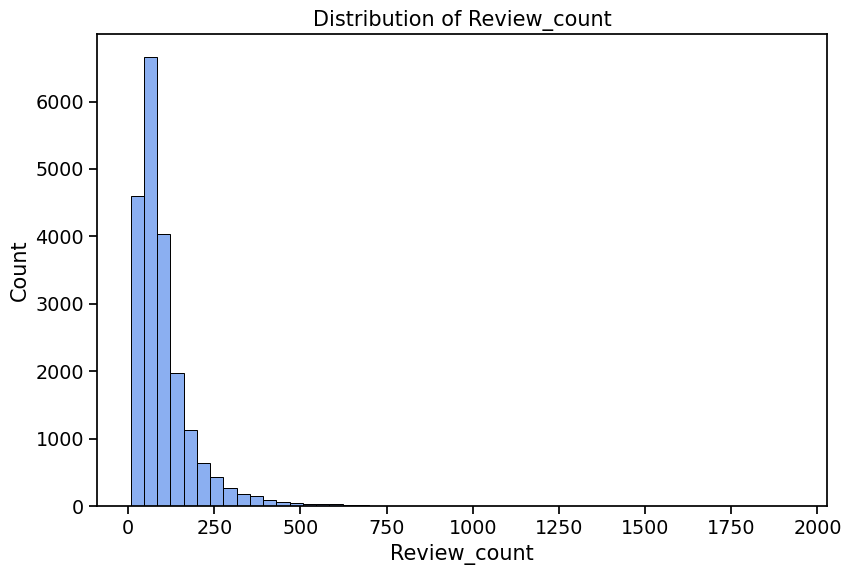

In [14]:
numerical_feature_cols=['Review_count']
display(HTML("<h3 style='color:red;font-size:22px;padding:0px 0px 0px 100px;font-weight:bold; text-align:left'> Distribution of Various Review counts</h3>"))
plt.figure(figsize=(24,6))
for i,col in enumerate(numerical_feature_cols):
    plt.subplot(1,3,i+1)
    sns.histplot(data=df,x=col,bins=50,color='#6495ED')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

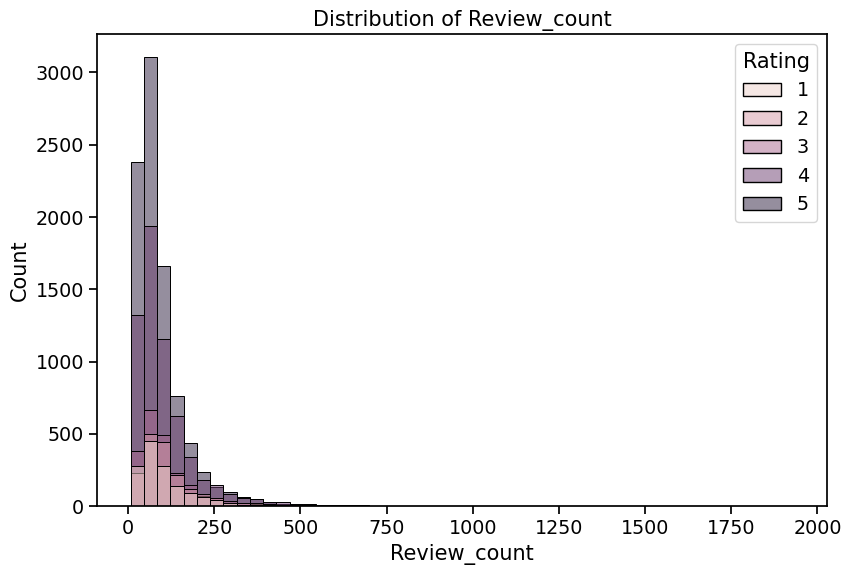

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
display(HTML("<h3 style='color:red;font-size:22px;padding:0px 0px 0px 60px;font-weight:bold; text-align:left'> Distribution of Various Review counts with respect to target</h3>"))

plt.figure(figsize=(24,6))
for i,col in enumerate(numerical_feature_cols):
    plt.subplot(1,3,i+1)
    sns.histplot(data=df,x=col,hue='Rating',bins=50)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

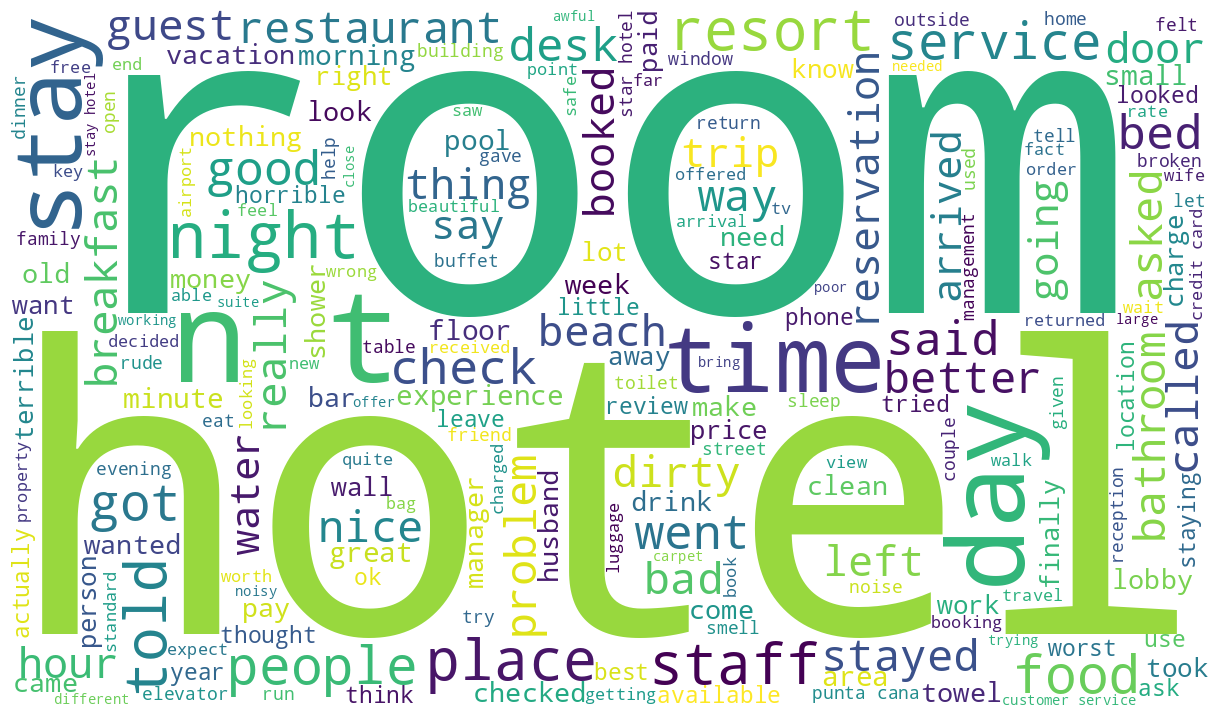

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import re

# Sample data
data = df
df = pd.DataFrame(data)

# Preprocess and concatenate reviews
text_list = df.loc[df['Rating'] == 1, 'Review'].tolist()
Review = " ".join(text_list)  # Combine the list of sentences into a single string


# Preprocess the combined text
Review = re.sub(r"<br>", " ", Review)
Review = re.sub(r"[^A-Za-z0-9]+", " ", Review)

# Generate the WordCloud
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=1200, height=700,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(Review)

# Plot the WordCloud image
plt.figure(figsize=(12, 7), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


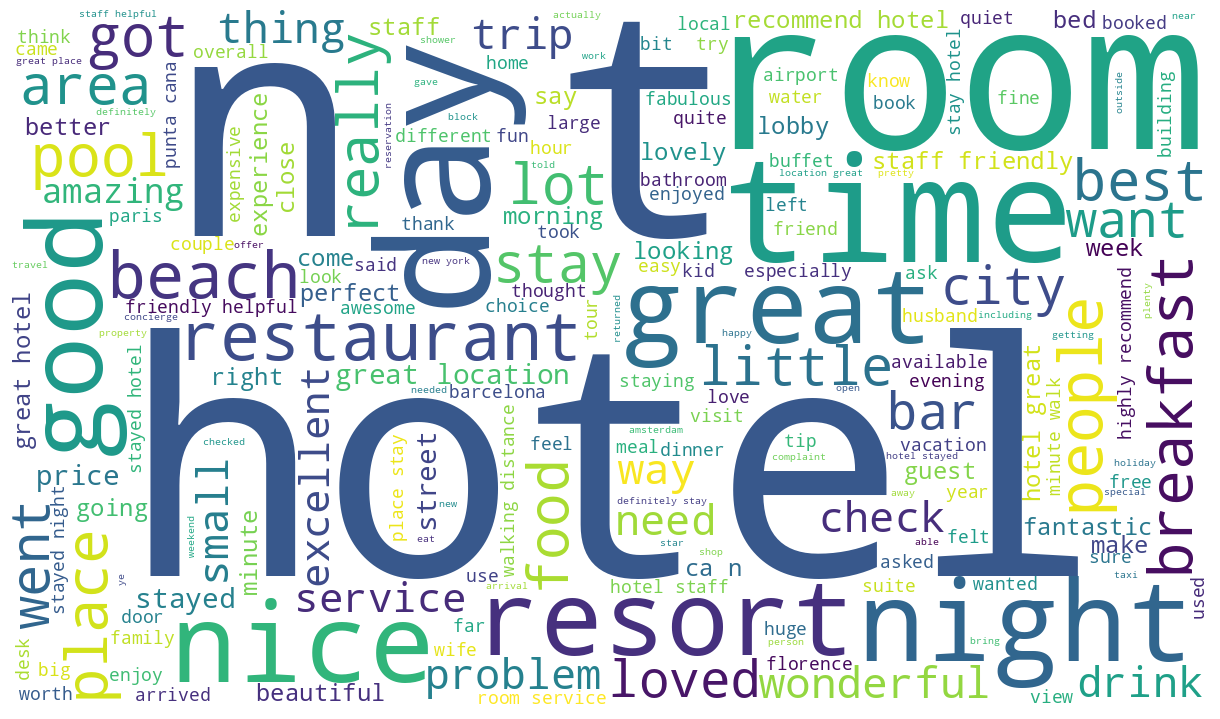

In [17]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import re

# Sample data
data = df
df = pd.DataFrame(data)

# Preprocess and concatenate reviews
text_list = df.loc[df['Rating'] == 5, 'Review'].tolist()
Review = " ".join(text_list)  # Combine the list of sentences into a single string


# Preprocess the combined text
Review = re.sub(r"<br>", " ", Review)
Review = re.sub(r"[^A-Za-z0-9]+", " ", Review)

# Generate the WordCloud
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=1200, height=700,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(Review)

# Plot the WordCloud image
plt.figure(figsize=(12, 7), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(df['Review'].to_numpy(),df['Rating'].to_numpy(),test_size=0.2,stratify=df['Rating'].to_numpy())

In [19]:
# check the count of different labels in the train and test set
Counter(ytrain),Counter(ytest)

(Counter({5: 7243, 3: 1747, 4: 4831, 2: 1434, 1: 1137}),
 Counter({5: 1811, 4: 1208, 2: 359, 3: 437, 1: 284}))

In [20]:
# define the model
model_0=Pipeline([
    ('tf-idf',TfidfVectorizer(stop_words='english')),
    ('clf',MultinomialNB())
])

In [ ]:
model_0.fit(xtrain,ytrain)


In [22]:
def binary_clf_evaluation(y_true,y_pred,time_taken):
    '''
    accepts true and predicted labels and calculates accuracy,precision,recall and f1_score
    '''
    model_accuracy=accuracy_score(y_true,y_pred)

    model_precision,model_recall,model_f1_score,_=precision_recall_fscore_support(y_true,y_pred,average='weighted')

    results={'accuracy':model_accuracy,
             'precision':model_precision,
             'recall':model_recall,
             'f1_score':model_f1_score,
             'time/instance':time_taken
            }
    return results

def store_results(exp_result,exp_name,overall_result=pd.DataFrame()):
    '''
    accepts the dictinary containing the various evaluation metrics for a experiment,the
    experiment name and overall_result Dataframe and return the overall_result
    dataframe after concatinating the results of exp_name
    '''
    df=pd.DataFrame(exp_result,index=[exp_name])
    return pd.concat([overall_result,df],axis=0)

def display_results(d):
    '''Takes a dictionary as input and display it using HTML.'''
    display(HTML(f"<h3>  <b style='color:red;font-size:22px;'>Model Performance</b>:</h3>"))
    for key,value in d.items():
        if key == "accuracy":
            display(HTML(f"<h3> <b style='color:#6495ED;font-size:22px;'>{key}</b>:  {value*100:.2f}%</h3>"))
        elif key=='time/instance':
            display(HTML(f"<h3> <b style='color:#6495ED;font-size:22px;'>{key}</b>:  {value:.4f} seconds</h3>"))

        else:
            display(HTML(f"<h3> <b style='color:#6495ED;font-size:22px;'>{key}</b>:  {value:.2f}</h3>"))

In [23]:
start_time=timeit.default_timer()
model_0_pred=model_0.predict(xtest)
end_time=timeit.default_timer()
time_taken_per_instance=(end_time-start_time)/len(xtest)
model_0_results=binary_clf_evaluation(ytest,model_0_pred,time_taken_per_instance)
display_results(model_0_results)
overall_results=store_results(model_0_results,"model_0")

In [24]:
training_dataset=tf.data.Dataset.from_tensor_slices((xtrain,ytrain)).batch(batch_size=32).prefetch(tf.data.AUTOTUNE)
test_dataset=tf.data.Dataset.from_tensor_slices((xtest,ytest)).batch(batch_size=32).prefetch(tf.data.AUTOTUNE)

In [25]:
# define the max vacabolary to tokenize
max_vocab_length=10000
# the words which are not amongst the top 10000 words will be represented using <oov> tag.

In [26]:
# max number of words in a movie review
max([len(x.split()) for x in xtrain])

1931

In [27]:
selected_news_length=round(np.percentile(([len(x.split()) for x in xtrain]),95))
selected_news_length
# this will be able to incoorporate 95 % of the entire instances without trancating the end part.

277

In [28]:
textVectorizer=layers.TextVectorization(
    max_tokens=max_vocab_length,
    output_mode='int',
    output_sequence_length=selected_news_length
);

textVectorizer.adapt(xtrain)

In [29]:
#shape of an instance after textVectorization
textVectorizer(xtrain[0]).shape

TensorShape([277])

In [30]:
embedding=layers.Embedding(
    input_dim=max_vocab_length,
    output_dim=128,
    input_length=selected_news_length
)

In [31]:
# shape of each instance after undergoing embedding layer
embedding(textVectorizer(xtrain[0])).shape

TensorShape([277, 128])

In [32]:
mixed_precision.set_global_policy('mixed_float16')
inputs=layers.Input(shape=(1,),dtype=tf.string)
x=textVectorizer(inputs)
x=embedding(x)
x=layers.GlobalAveragePooling1D()(x)
x=layers.Dropout(0.15)(x)
outputs=layers.Dense(1,activation='sigmoid',dtype=tf.float32)(x)
model_1=keras.models.Model(inputs,outputs,name="model_1")

The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [ ]:
# summary of model_1
keras.utils.plot_model(model_1,show_shapes=True)

In [34]:
model_1.compile(
    loss=keras.losses.binary_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [35]:
model_1_history=model_1.fit(
    training_dataset,
    steps_per_epoch=len(training_dataset),
    epochs=5,
    validation_data=test_dataset,
    validation_steps=len(test_dataset)
)

Epoch 1/5
513/513 [==============================] - 25s 46ms/step - loss: -73.8418 - accuracy: 0.0694 - val_loss: -224.2388 - val_accuracy: 0.0693
Epoch 2/5
513/513 [==============================] - 23s 45ms/step - loss: -517.7086 - accuracy: 0.0694 - val_loss: -878.9509 - val_accuracy: 0.0693
Epoch 3/5
513/513 [==============================] - 34s 67ms/step - loss: -1357.6688 - accuracy: 0.0694 - val_loss: -1894.8424 - val_accuracy: 0.0693
Epoch 4/5
513/513 [==============================] - 29s 57ms/step - loss: -2531.0754 - accuracy: 0.0694 - val_loss: -3216.1421 - val_accuracy: 0.0693
Epoch 5/5
513/513 [==============================] - 24s 46ms/step - loss: -3990.1660 - accuracy: 0.0694 - val_loss: -4814.3638 - val_accuracy: 0.0693


In [36]:
start_time=timeit.default_timer()
model_1_pred_prob=model_1.predict(test_dataset)
model_1_pred=tf.squeeze(tf.round(model_1_pred_prob))
end_time=timeit.default_timer()
time_taken_per_instance=(end_time-start_time)/len(xtest)
model_1_results=binary_clf_evaluation(ytest,model_1_pred,time_taken_per_instance)
display_results(model_1_results)

129/129 [==============================] - 1s 9ms/step


In [37]:
overall_results=store_results(model_1_results,"model_1",overall_results)
overall_results

,accuracy,precision,recall,f1_score,time/instance
model_0,0.445475,0.239562,0.445475,0.282784,0.000278
model_1,0.069285,0.004800,0.069285,0.008979,0.000345


In [38]:
inputs=layers.Input(shape=(1,),dtype=tf.string)
x=textVectorizer(inputs)
x=embedding(x)
x=layers.SimpleRNN(32)(x)
x=layers.Dropout(0.2)(x)
outputs=layers.Dense(1,activation='sigmoid',dtype=tf.float32)(x)
model_2=keras.models.Model(inputs,outputs,name="model_2")

In [ ]:
# model_2 summary
keras.utils.plot_model(model_2)

In [ ]:
model_2.compile(
    loss=keras.losses.binary_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
model_2_history=model_2.fit(
    training_dataset,
    steps_per_epoch=len(training_dataset),
    epochs=5,
    validation_data=test_dataset,
    validation_steps=len(test_dataset)
)

Epoch 1/5
513/513 [==============================] - 502s 975ms/step - loss: -40.6163 - accuracy: 0.0693 - val_loss: -65.8936 - val_accuracy: 0.0693
Epoch 2/5
513/513 [==============================] - 504s 983ms/step - loss: -90.6687 - accuracy: 0.0694 - val_loss: -115.6022 - val_accuracy: 0.0693
Epoch 3/5
513/513 [==============================] - 504s 983ms/step - loss: -140.2318 - accuracy: 0.0694 - val_loss: -165.2325 - val_accuracy: 0.0693
Epoch 4/5
513/513 [==============================] - 500s 975ms/step - loss: -190.1070 - accuracy: 0.0694 - val_loss: -214.9082 - val_accuracy: 0.0693
Epoch 5/5
513/513 [==============================] - 502s 980ms/step - loss: -239.4945 - accuracy: 0.0694 - val_loss: -264.5282 - val_accuracy: 0.0693


In [ ]:
start_time=timeit.default_timer()
model_2_pred_prob=model_2.predict(test_dataset)
model_2_pred=tf.squeeze(tf.round(model_2_pred_prob))
end_time=timeit.default_timer()
time_taken_per_instance=(end_time-start_time)/len(xtest)
model_2_results=binary_clf_evaluation(ytest,model_2_pred,time_taken_per_instance)
display_results(model_2_results)

129/129 [==============================] - 38s 295ms/step


In [ ]:
overall_results=store_results(model_2_results,"model_2",overall_results)
overall_results

,accuracy,precision,recall,f1_score,time/instance
model_0,0.445962,0.313952,0.445962,0.285264,0.000120
model_1,0.069285,0.004800,0.069285,0.008979,0.000393
model_2,0.069285,0.004800,0.069285,0.008979,0.010041
